# Fetch the Answeres to these questions???
1. How many matches played by the Batting Team against Bowling team ???
2. How many matches won by each team??? 

In [1]:
import pandas as pd
import seaborn as sns
from pathlib import Path
from pprint import pprint
from matplotlib import pyplot as plt
%matplotlib inline

sns.set_theme(style="darkgrid")


In [2]:
ds_path = '..\dataset\\all_matches.csv'

df = pd.read_csv(ds_path,usecols=['match_id', 'venue', 'innings', 'ball', 'batting_team', 'bowling_team', 'runs_off_bat', 'extras'])


# Clean Dataset 

In [3]:
df.columns

Index(['match_id', 'venue', 'innings', 'ball', 'batting_team', 'bowling_team',
       'runs_off_bat', 'extras'],
      dtype='object')

In [4]:
# 1. Drop columns 
#df.drop(columns=['season','start_date','striker', 'non_striker', 'bowler','wides', 'noballs', 'byes', 'legbyes',       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type','other_player_dismissed'], inplace=True)

# 2. Delete Non-existing teams : 'Kochi Tuskers Kerala' 'Pune Warriors','Rising Pune Supergiants', 'Rising Pune Supergiant','Gujarat Lions'

mask_bat_team = df['batting_team'].isin(['Kochi Tuskers Kerala',
                                'Pune Warriors',
                                'Rising Pune Supergiants',
                                'Rising Pune Supergiant',
                                'Gujarat Lions'                                
                            ])

mask_bow_team = df['bowling_team'].isin(['Kochi Tuskers Kerala',
                                'Pune Warriors',
                                'Rising Pune Supergiants',
                                'Rising Pune Supergiant',
                                'Gujarat Lions'                                
                            ])
df = df[~mask_bat_team]
df = df[~mask_bow_team]
print(df.shape)

#3. Replace the old team names with new team name:
df.loc[df.batting_team == 'Delhi Daredevils','batting_team'] = 'Delhi Capitals'
df.loc[df.batting_team == 'Deccan Chargers','batting_team'] = 'Sunrisers Hyderabad'

df.loc[df.bowling_team == 'Delhi Daredevils','bowling_team'] = 'Delhi Capitals'
df.loc[df.bowling_team == 'Deccan Chargers','bowling_team'] = 'Sunrisers Hyderabad'



# 4. Replace venue column unique names :
df.loc[df.venue == 'M.Chinnaswamy Stadium','venue'] = 'M Chinnaswamy Stadium'
df.loc[df.venue == 'Punjab Cricket Association IS Bindra Stadium, Mohali','venue'] = 'Punjab Cricket Association Stadium'
df.loc[df.venue == 'Punjab Cricket Association IS Bindra Stadium','venue'] = 'Punjab Cricket Association Stadium'
df.loc[df.venue == 'Wankhede Stadium, Mumbai','venue'] = 'Wankhede Stadium'
df.loc[df.venue == 'Rajiv Gandhi International Stadium, Uppal','venue'] = 'Rajiv Gandhi International Stadium'
df.loc[df.venue == 'MA Chidambaram Stadium, Chepauk' ,'venue'] = 'MA Chidambaram Stadium'
df.loc[df.venue == 'MA Chidambaram Stadium, Chepauk, Chennai' ,'venue'] = 'MA Chidambaram Stadium'

pprint('### Total {} : venue details present '.format(len(df.venue.unique())))
pprint('### Total {}  : Batting teams are there'.format(len(df.batting_team.unique())))
pprint('### Total {}  : Bowlling teams are there'.format(len(df.bowling_team.unique())))

print(df.shape)

<ipython-input-4-4aacc09f9a57>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~mask_bow_team]
(173645, 8)
'### Total 36 : venue details present '
'### Total 9  : Batting teams are there'
'### Total 9  : Bowlling teams are there'
(173645, 8)


In [11]:
df.to_csv('..\dataset\\plot.csv',index=False)

# Question-1: 
### How many matches played by the Batting Team against Bowling team ???
### How many matches won by each team???

In [12]:
bowl,bat = 'Mumbai Indians','Chennai Super Kings'

In [13]:
df_req = df.query(f'(batting_team == "{bat}" and bowling_team == "{bowl}") or (batting_team == "{bowl}" and bowling_team == "{bat}")').copy()

df_req['finalScore'] = df_req['runs_off_bat'] + df_req['extras']
df_req.shape

(7510, 9)

In [14]:
#df1 = df.loc[(df.batting_team==bat) & (df.bowling_team == bowl)]
#df2 = df.loc[(df.batting_team==bowl) & (df.bowling_team == bat)]
#df_req = pd.concat([df1,df2])

In [15]:
total_matches_played = df_req.match_id.unique().shape[0]

In [16]:
df_req.loc[df.ball<6.1].groupby(['match_id','venue','innings','batting_team','bowling_team'])['finalScore'].sum()

match_id  venue                        innings  batting_team         bowling_team       
335989    MA Chidambaram Stadium       1        Chennai Super Kings  Mumbai Indians         53
                                       2        Mumbai Indians       Chennai Super Kings    52
336018    Wankhede Stadium             1        Chennai Super Kings  Mumbai Indians         28
                                       2        Mumbai Indians       Chennai Super Kings    78
392181    Newlands                     1        Mumbai Indians       Chennai Super Kings    40
                                                                                            ..
1216492   Sheikh Zayed Stadium         2        Chennai Super Kings  Mumbai Indians         37
1216521   Sharjah Cricket Stadium      1        Chennai Super Kings  Mumbai Indians         24
                                       2        Mumbai Indians       Chennai Super Kings    52
1254084   Arun Jaitley Stadium, Delhi  1        Chennai 

In [17]:
df_req.groupby(['match_id','venue','innings','batting_team','bowling_team'])['finalScore'].sum()

match_id  venue                        innings  batting_team         bowling_team       
335989    MA Chidambaram Stadium       1        Chennai Super Kings  Mumbai Indians         208
                                       2        Mumbai Indians       Chennai Super Kings    202
336018    Wankhede Stadium             1        Chennai Super Kings  Mumbai Indians         156
                                       2        Mumbai Indians       Chennai Super Kings    158
392181    Newlands                     1        Mumbai Indians       Chennai Super Kings    165
                                                                                           ... 
1216492   Sheikh Zayed Stadium         2        Chennai Super Kings  Mumbai Indians         166
1216521   Sharjah Cricket Stadium      1        Chennai Super Kings  Mumbai Indians         114
                                       2        Mumbai Indians       Chennai Super Kings    116
1254084   Arun Jaitley Stadium, Delhi  1       

In [18]:
df_score = pd.concat([
    df_req.groupby(['match_id','venue','innings','batting_team','bowling_team'])['finalScore'].sum(),
    df_req.loc[df.ball<6.1].groupby(['match_id','venue','innings','batting_team','bowling_team'])['finalScore'].sum()],
    axis=1,
    keys=['20-score','6-score']

)

#df_score.to_csv('tmp.csv')

In [39]:
df_plot = df_score.reset_index()

In [ ]:
#df_plot = pd.read_csv('tmp.csv')
#df_plot.head()
#df_plot = df_score

In [40]:
win_history = {}
win_series = []
for k,v in df_score.groupby(['match_id']):
    #print('### {} : {} won'.format(k,v.loc[v['20-score']==v['20-score'].values.max()].index[0][3]))
    win_series.append(v.loc[v['20-score']==v['20-score'].values.max()].index[0][3])
    win_series.append(None)

    win_history[k] = v.loc[v['20-score']==v['20-score'].values.max()].index[0][3]


#win_history
print('### Total number of matches played with each other : {} = {} - won by {} team + {} - won by {} team'.format(total_matches_played,list(win_history.values()).count(bat),bat,list(win_history.values()).count(bowl),bowl
    ))


### Total number of matches played with each other : 31 = 12 - won by Chennai Super Kings team + 19 - won by Mumbai Indians team


In [41]:
win_series[:5]

['Chennai Super Kings', None, 'Mumbai Indians', None, 'Mumbai Indians']

In [42]:
df_plot['won'] = pd.Series(win_series)
#df_plot.to_csv('tmp.csv',index=False)
#df_plot.head()

In [43]:
df_plot

,match_id,venue,innings,batting_team,bowling_team,20-score,6-score,won
0,335989,MA Chidambaram Stadium,1,Chennai Super Kings,Mumbai Indians,208,53,Chennai Super Kings
1,335989,MA Chidambaram Stadium,2,Mumbai Indians,Chennai Super Kings,202,52,None
2,336018,Wankhede Stadium,1,Chennai Super Kings,Mumbai Indians,156,28,Mumbai Indians
3,336018,Wankhede Stadium,2,Mumbai Indians,Chennai Super Kings,158,78,None
4,392181,Newlands,1,Mumbai Indians,Chennai Super Kings,165,40,Mumbai Indians
...,...,...,...,...,...,...,...,...
57,1216492,Sheikh Zayed Stadium,2,Chennai Super Kings,Mumbai Indians,166,37,None
58,1216521,Sharjah Cricket Stadium,1,Chennai Super Kings,Mumbai Indians,114,24,Mumbai Indians
59,1216521,Sharjah Cricket Stadium,2,Mumbai Indians,Chennai Super Kings,116,52,None
60,1254084,"Arun Jaitley Stadium, Delhi",1,Chennai Super Kings,Mumbai Indians,218,49,Mumbai Indians


In [44]:
df_plot['6-score'].min()

24

# Question-2: How many times won by each team???

In [45]:
df_plot['won']

0     Chennai Super Kings
1                    None
2          Mumbai Indians
3                    None
4          Mumbai Indians
             ...         
57                   None
58         Mumbai Indians
59                   None
60         Mumbai Indians
61                   None
Name: won, Length: 62, dtype: object

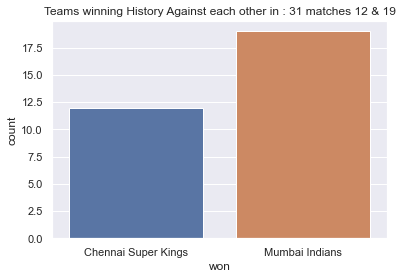

In [46]:
sns.countplot(x=df_plot['won']);
#plt.title('Teams winning History Against each other in : {} matches'.format(total_matches_played));
plt.title('Teams winning History Against each other in : {} matches {} & {}'.format(
        total_matches_played,list(win_history.values()).count(bat),list(win_history.values()).count(bowl)))
plt.savefig('1.png')

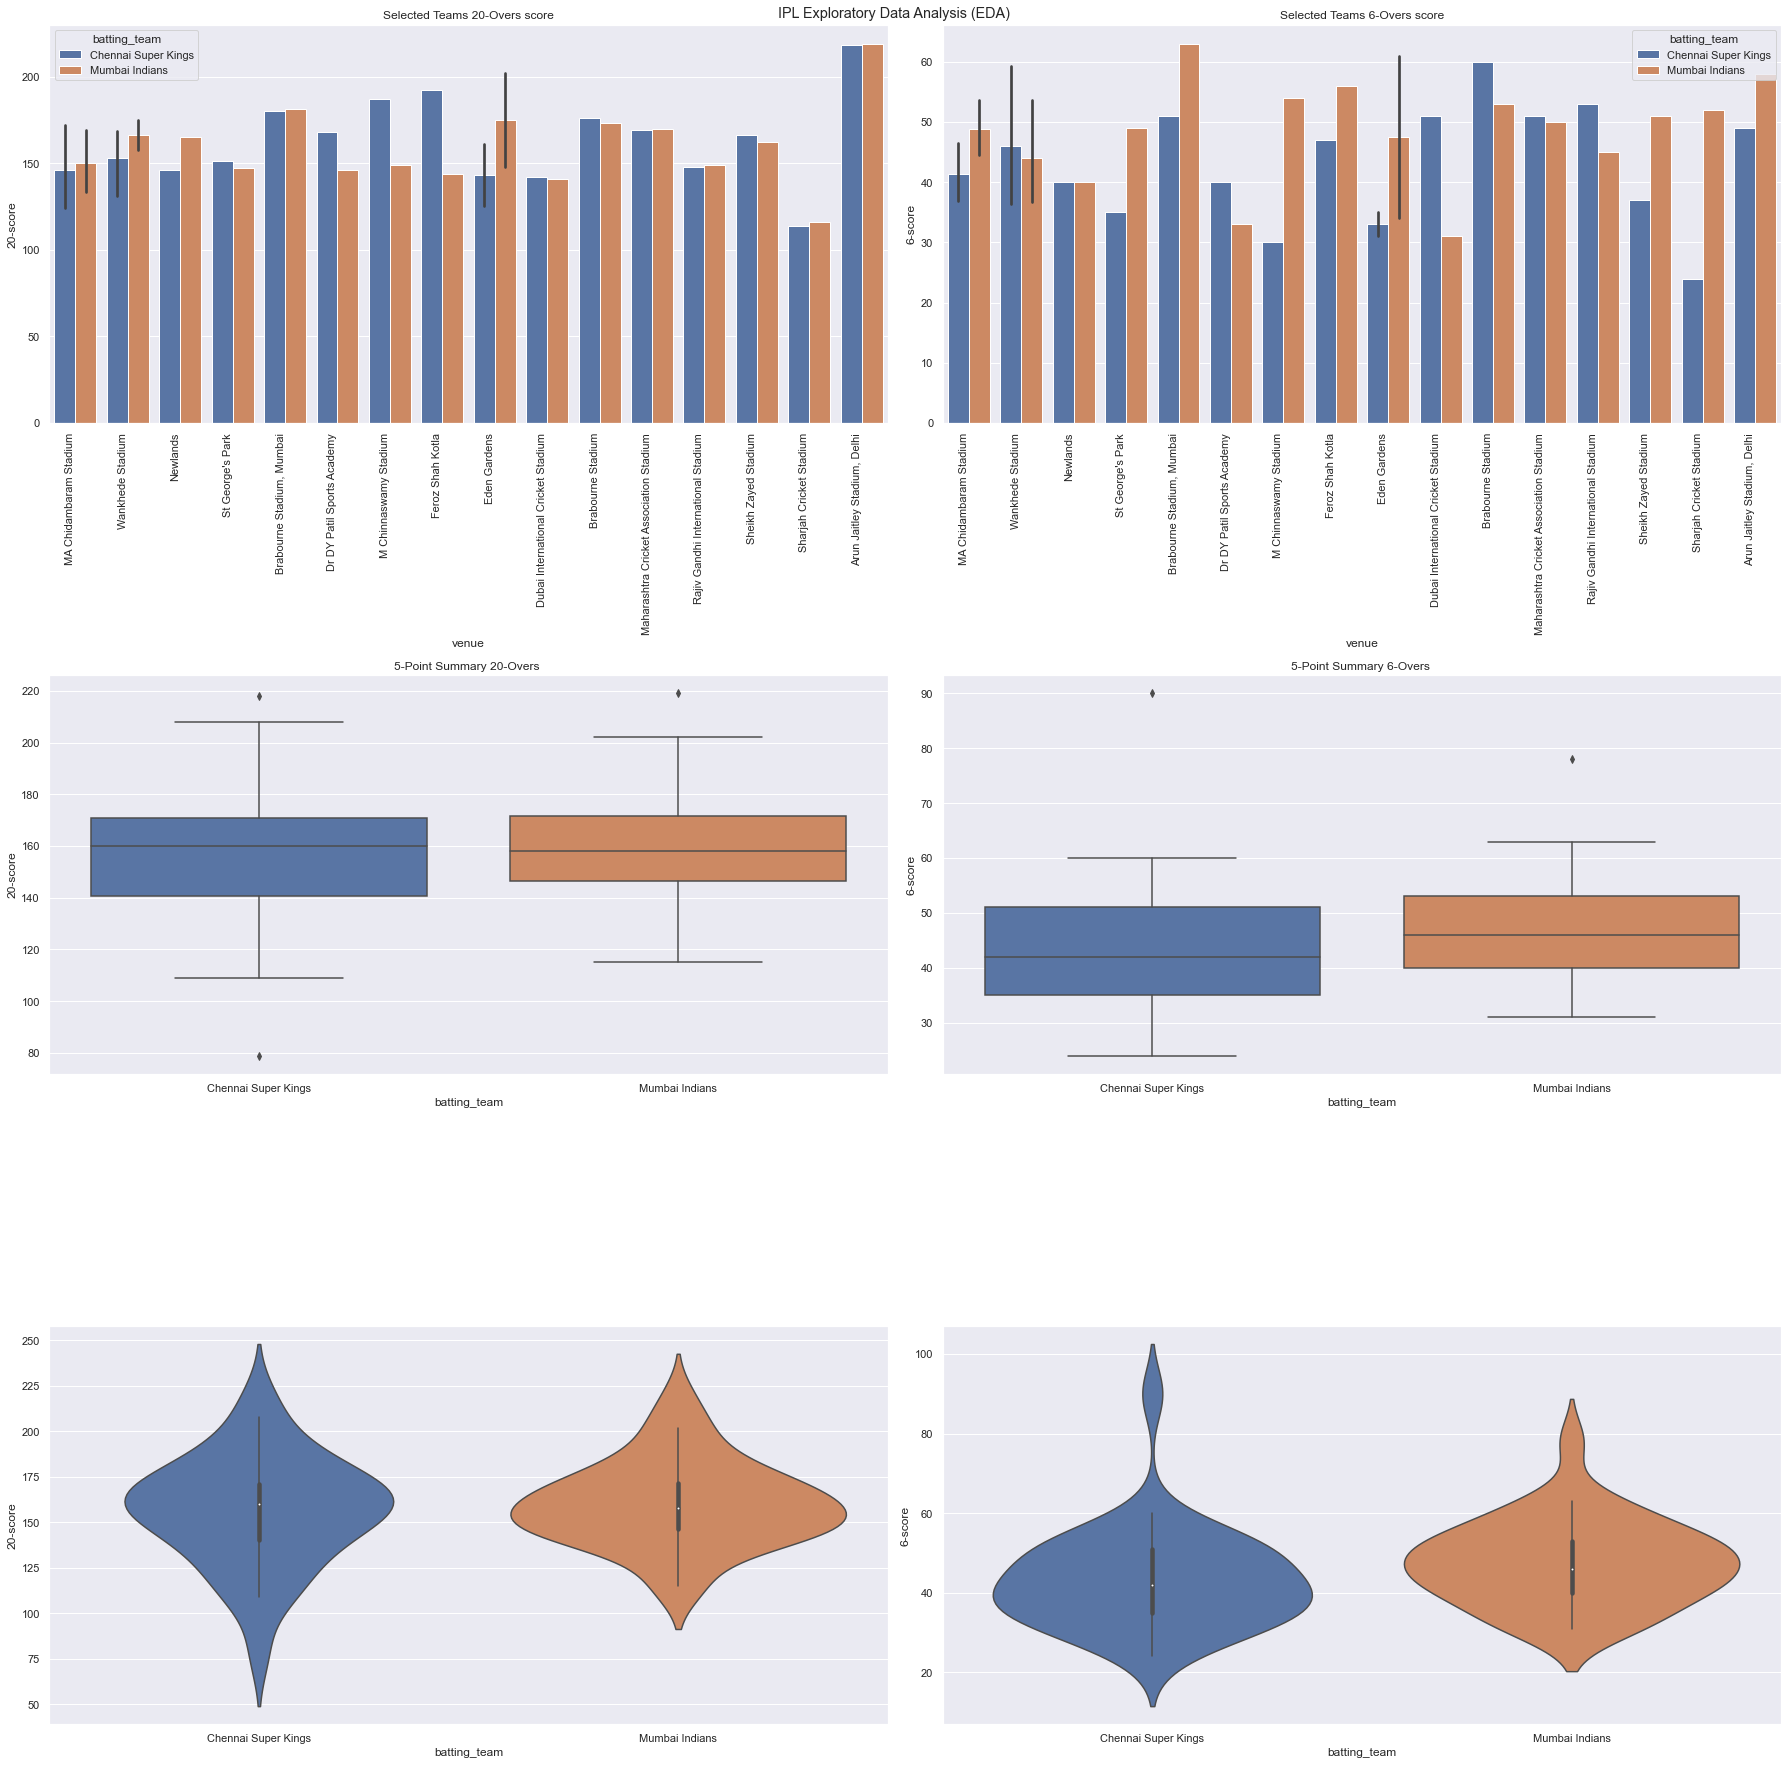

In [47]:
fig,ax = plt.subplots(3,2,figsize=(25,25))

fig.suptitle('IPL Exploratory Data Analysis (EDA)')

#sns.countplot(x=df_plot['won'],ax=ax[0,0]);
#ax[0,0].set_title('Teams winning History Against each other in : {} matches'.format(total_matches_played));

barplt = sns.barplot(x=df_plot['venue'],y=df_plot['20-score'], ax=ax[0,0],hue='batting_team',data=df_plot);
loc, labels = plt.xticks()
barplt.set_xticklabels(barplt.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
ax[0,0].set_title('Selected Teams 20-Overs score');

barplt = sns.barplot(x=df_plot['venue'],y=df_plot['6-score'], ax=ax[0,1],hue='batting_team',data=df_plot);
loc, labels = plt.xticks()
barplt.set_xticklabels(barplt.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
ax[0,1].set_title('Selected Teams 6-Overs score');


sns.boxplot(x=df_plot['batting_team'],y=df_plot['20-score'],ax=ax[1,0])
ax[1,0].set_title('5-Point Summary 20-Overs ')


sns.boxplot(x=df_plot['batting_team'],y=df_plot['6-score'],ax=ax[1,1])
ax[1,1].set_title('5-Point Summary 6-Overs ')

sns.violinplot(x=df_plot['batting_team'],y=df_plot['20-score'],ax=ax[2,0])
sns.violinplot(x=df_plot['batting_team'],y=df_plot['6-score'],ax=ax[2,1])

#sns.displot(x=df_plot['6-score'],ax=ax[1,0]);

#plt.setp(ax, yticks=[])
plt.tight_layout();
fig.savefig('2.png')

In [ ]:
sns.displot(x=df_plot['6-score'],bins=30,ax=ax[1,1])

In [ ]:
plt.figure(figsize=(25,20))
sns.relplot(x='batting_team',y='20-score',hue='innings',style='venue',palette="ch:r=-.5,l=.75",data=df_plot);


In [ ]:
sns.relplot(x='batting_team',y='6-score',hue='innings',style='venue',palette="ch:r=-.5,l=.75",data=df_plot,);

In [ ]:
sns.lmplot(x = '6-score', y = '20-score', data = df_plot, hue = 'innings');
plt.title('Innings vs Score');
plt.tight_layout();
plt.savefig('3.png')

In [ ]:
sns.heatmap(df_plot.corr(), annot = True, cmap = 'viridis')

In [ ]:
from PIL import Image
import io,base64



In [ ]:
img = Image.open('tmp.png')
output_buffer = io.BytesIO()
img.save(output_buffer,format='PNG')
base64_str = base64.b64encode(output_buffer.getvalue())
base64_str